<a href="https://colab.research.google.com/github/viriditass/Papers/blob/main/InfoGAN_Interpretable_Representation_Learning_by_Information_Maximizing_Generative_Adversarial_Nets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **InfoGAN: Interpretable Representation Learning by Information Maximizing Generative Adversarial Nets**

논문 링크: https://arxiv.org/abs/1606.03657

InfoGAN을 살펴보기 전에, GAN의 어떤 문제점을 보완했는지 알아보기 위해 기존 GAN의 문제점을 살펴보겠다. GAN은 특정 개수의 noise가 신경명알 거쳐 어떠한 데이터를 만들어 낸다. 여기서 **noise의 분포가 꼬였는(entangled) 것**이 문제였다.

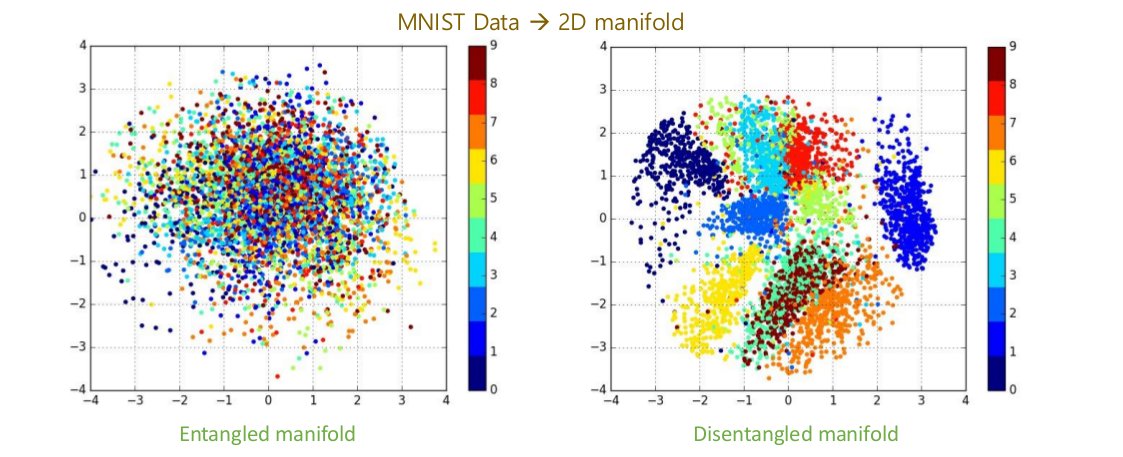

위 사진의 출처: 이활석님

위의 사진에서 왼쪽 분포를 보면 데이터들이 무질서하게 배치되어 있는 것을 볼 수 있다. 이런 분포를 꼬였다라고 표현한다. 당연하게도 이렇게 데이터들이 꼬여있으면 유의미한 정보를 파악하기 어렵다. 즉, GAN은 데이터의 분포가 꼬여있기 때문에 노이즈를 연속적으로 변화시켜도 만들어지는 이미지가 연속적이지 않다.

그러면 위의 사진에서 오른쪽 분포와 같이 어떠한 의미를 갖도록 하려면 어떻게 해야할까? 오른쪽 사진을 보면 MNIST 데이터에서 숫자를 기준으로 일련의 클러스트를 이루고 있는 것을 확인할 수 있다. **이런 분포를 풀려있다(disentagled)**라고 하는데, 만일 기존 GAN에서 이러한 방식으로 noise 분포를 표현할려면 label를 달아줘야 한다. 하지만 label을 달지 않고 unsupervised learning을 할 수 있으면 어떨까?

## **Info GAN 구조**

InfoGAN은 **기존 GAN에 entropy와 상호정보량(mutual information)이라는 정보이론(information theory)을 반영하여 unsupervised learning만으로 데이터의 특징을 적절히 표현**할 수 있다.

여기서 문제점은 바로 unsupervised learning을 어떻게 시킬 것인지가 제일 큰 관건이 었는데, 그 이유는 기존 100차원의 noise에 몇 개의 값을 추가한다고 한들, Generator가 noise를 사용하는 방식에는 어떠한 제한도 없었기 때문에 추가해도 noise의 차원이 늘어나는 효과 그 이상 이하도 아니였다.

그래서 InfoGAN은 Loss function에 추가적인 항을 덧붙이는 방식으로 이를 커버했는데, **기존 GAN에 쓰이는 noise z**와 **분포에서 중요한 값을 표현하는 사용하는 노이즈 c**를 활용했다. 즉, **c를 unsupervised leaning을 통해 학습시키겠다는 뜻**이다. 더욱 자세한 내용은 아래의 Loss function을 살펴보면서 알아보겠다.

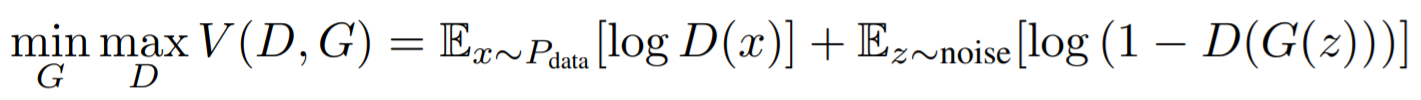

먼저 위의 식은 기존 GAN의 Loss function인데, 이는 GAN 논문에서 살펴봤으니 넘어가겠다.

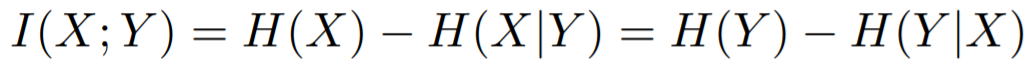

위의 식은 **Mutual Information(상호정보량)** 식이다. 간단하게 설명하자면 X와 Y의 상호정보량을 I(X; Y)로 표현하고 이는 Y를 알 때, X의 불확실성이 얼마나 감소하는지를 나타낸다. 만약 X와 Y가 independent 즉, 독립 관계이면 Y와 X 사이의 연관성이 하나도 없기 때문에 I(X; Y)의 값은 0이 되겠다.

Information Theory에 대해 더 자세히 알고 싶으면: https://github.com/viriditass/Miscellaneous/blob/main/Information_Theory.ipynb 를 참고하면 된다.

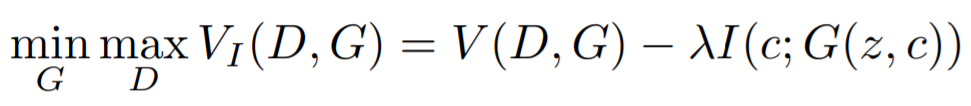

위의 그림이 바로 InfoGAN의 Loss function이다. 해당 식에서 V(D, G)는 일반 GAN의 Loss fucntion이다. D의 입장은 기존 GAN과 같고, G의 입장이 추가되었다. G의 입장을 보면 위의 함수를 minimum하게 해야하기 때문에 I(c; G(z, c))를 최대화해야한다. 즉, 이는 **latent code c와 Generator가 만들어내는 sample들의 분포 G(z, c)가 높은 상호정보량을 가져한다**는 것이다.

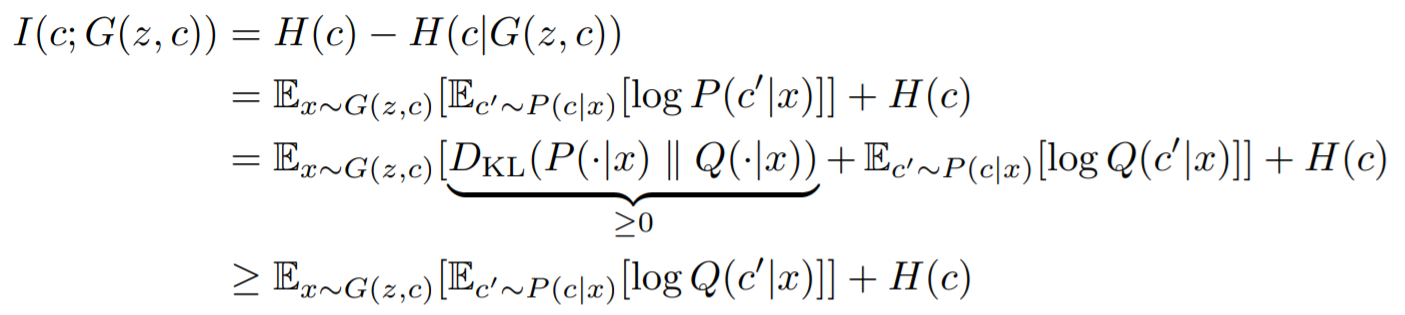

하지만, 이 과정에서 P(c|x)를 알아야만 위의 상호정보량을 구할 수 있다는 문제가 발생하는데,

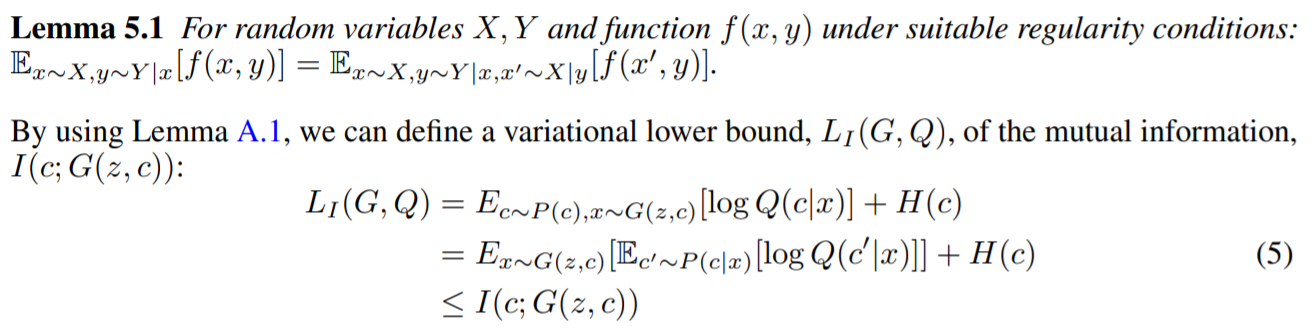

이에 어떠한 분포 Q(c|x)를 이용해 L1(G, Q)를 I(c; G(z, c))의 lower bound(하향선)이 되게 한다. 즉, 상호정보량을 직접 구하는 대신 구하기 쉬운 Q를 사용해 하한선을 표현하고 이 하한선을 최대화하는 것이다.

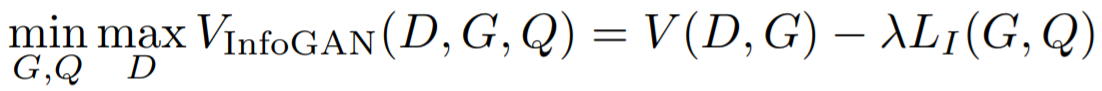

Q를 사용해 Loss function을 재정의하면 위와 같은 식이 된다.